In [1]:
from IPython.display import display, Math, Latex

import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Assignment 1: Leverage

**Name:** Tanay Kashyap

**Student Number:** 20938917

**Due:** Sept 26, 2021 at 11:59pm ET on Dropbox

**What to submit:** your .ipynb (python code in jupyter notebooks) file as well as a pdf with all the output from your code.  

Please make sure that each question outputs onto a new page. 
You can do this by inserting a code chunk with the following after each question.
```
%%latex
\newpage
```

## Rules
* You can talk to your friends in general about the assignment, but what you submit must be your own work.  
* Please use Piazza to ask questions if you need clarification
* You can follow the format of the template notebook to complete this assignment
* Make sure to define any new variables and functions that you are using. 
* Comment your code liberally.  If you are doubtful whether you should comment a part of your code, it is better to do it.
* Please make sure to answer any questions that were posed to you at the conclusion of the question. For example (not related to this assignment, and not something that most of you will understand yet) "since the result of 3.1 is greater than zero 0, we can conclude that there is a positive payoff and so the option has both intrinsic and time value"

## Objectives
At the end of the assignment, you will:
* Be able to retreive basic statistics about a given stock
* Understand the effect of leverage on your portfolio

### Data 

For this assignment, all the data will come from **Yahoo Finance** (yfinance). This will be used to collect the share information, and then you will use Python to complete the remainder of the assignment. 

**Language:** Python 

**Libraries Allowed:** pandas, matplotlib, yfinance


#### Assumptions:
* Fractional shares are allowed

## Q1 

First, build your simple portfolio without any borrowing, i.e., you are using your own money. You have $2000 to invest into Air Canada (AC.TO), and make no further investments.

### a) 
Find the monthly open price data for Air Canada and display this in a DataFrame called `prices`. Make sure to use the Open price for consistency (note that an open price is the price at which an asset begins trading for a given day.  You are to use data between the beginning of 2019 and the beginning of 2021.

In [2]:
# Get info for AC 
ac=yf.Ticker('AC.TO')

# start and end dates
start_date='2019-01-01'
end_date='2021-01-01'

# get open prices monthly for 2yr interval
monthly=ac.history(start=start_date, end=end_date, interval='1mo')
open_prices=monthly['Open']

#make monthly prices in dataframe
prices=pd.DataFrame(open_prices)
prices.head()

,Open
Date,
2019-01-01,25.490000
2019-02-01,29.790001
2019-03-01,33.599998
2019-04-01,32.439999
2019-05-01,32.139999


In [3]:
%%latex
\newpage

<IPython.core.display.Latex object>

### b)
Using all your money, how many shares can you purchase on Jan 2, 2019 (assume you can purchase at the open price)? 

In [4]:
capital=2000
shares=capital/(prices.loc['2019-01-01','Open'])
print('You purchased', round(shares,2),"shares of 'AC.TO'")

You purchased 78.46 shares of 'AC.TO'


In [5]:
#Portfolio 1 Value
port_1_value=(shares*prices)
#print(port_1_value)
prices['Portfolio1']=port_1_value['Open']
prices.head()

,Open,Portfolio1
Date,,
2019-01-01,25.490000,2000.000000
2019-02-01,29.790001,2337.387303
2019-03-01,33.599998,2636.327876
2019-04-01,32.439999,2545.311802
2019-05-01,32.139999,2521.773219


In [6]:
%%latex
\newpage

<IPython.core.display.Latex object>

### c) 
Calculate and graph your portfolio value over the entire period. Please include appropriate titles and labels.  

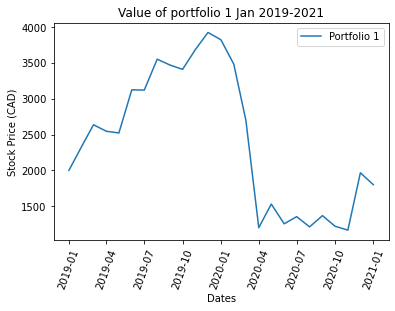

In [7]:
plt.plot(prices.index, prices['Portfolio1'] , label='Portfolio 1')

# Define label
plt.title('Value of portfolio 1 Jan 2019-2021')
plt.xlabel('Dates')
plt.xticks(rotation=70)
plt.ylabel('Stock Price (CAD)')

# Create legend
plt.legend(loc='best')

plt.show()

In [8]:
%%latex
\newpage

<IPython.core.display.Latex object>

### d) 
We want to take a look at some descriptive statistics for our portfolio.  For each of these questions, you will need to perform and show code for calculations on data.  Don't forget to state the answer afterwards.

#### i. What is the maximum value of the portfolio?
#### ii. What is the minimum value of the portfolio?
#### iii. What is the standard deviation of the portfolio?
#### iv. What is the mean of the portfolio?
#### v. What is the range of the portfolio?

In [9]:
port_value=round(shares*prices,2)

#max value
max_port_value=port_value.Open.max()
print(max_port_value)

#min value
min_port_value=port_value.Open.min()
print(min_port_value)

#std
std_port=port_value.Open.std()
print(std_port)

#mean
mean_port=port_value.Open.mean()
print(mean_port)

#range
range_port=max_port_value-min_port_value
print(range_port)

3923.89
1165.95
969.9622641628899
2416.07
2757.9399999999996


In [10]:
%%latex
\newpage

<IPython.core.display.Latex object>

## Q2 - 2:1 Margin 

Now, let's say that you are able to borrow \\$2000 in addition to the \\$2000 you already have.  Thus you are going to "Buy on Margin". Consider your new portfolio made up of:
* \\$2000 of AC shares paid with your own cash (as in the previous part)
* an additional \\$2000 of AC shares on margin

### a) 
Using your cash and the cash you borrowed, how many shares can you buy on Jan 2, 2019? 

In [11]:
capital_margin1=4000
#shares bought on 2:1 Margin
shares1=capital_margin1/(prices.loc['2019-01-01','Open'])
print('You purchased', round(shares1,2),"shares of 'AC.TO'")

You purchased 156.92 shares of 'AC.TO'


In [12]:
%%latex
\newpage

<IPython.core.display.Latex object>

### b)

Assume that the loan from the margin account has an annual interest rate of 8.325% with equal monthly payments based off that rate. Recalculate your portfolio value as `portfolio2` and store this in the `prices` DataFrame.  

```
Hint 1: Remember that you own the shares that you purchase on margin, but your lender has a claim on the borrowed amount, i.e., you owe the lender the original loan amount back (and the interest payments).  Thus, when considering the portfolio value, assume that we are interested in the value the lender's claim is deducted.

Hint 2: You will need to convert the annual interest rate to a monthly interest rate.
```

In [29]:
monthly_interest=0.08325/12
Portfolio2=shares1*prices['Open']
prices['Portfolio2']=Portfolio2-(monthly_interest*2000)
prices['Portfolio2'].loc['2019-01-01'] = 4000

Date
2019-01-01    4000.000000
2019-02-01    4674.774607
2019-03-01    5272.655751
2019-04-01    5090.623604
2019-05-01    5043.546438
2019-06-01    6247.156019
2019-07-01    6240.878904
2019-08-01    7102.392896
2019-09-01    6937.622516
2019-10-01    6818.360322
2019-11-01    7375.441416
2019-12-01    7847.783252
2020-01-01    7645.351378
2020-02-01    6962.730377
2020-03-01    5398.195659
2020-04-01    2400.941597
2020-05-01    3060.023566
2020-06-01    2509.219288
2020-07-01    2708.513203
2020-08-01    2422.910901
2020-09-01    2736.759622
2020-10-01    2441.741947
2020-11-01    2331.894828
2020-12-01    3932.522509
2021-01-01    3601.412471
Name: Open, dtype: float64

In [14]:
%%latex
\newpage

<IPython.core.display.Latex object>

### c)
Plot your portfolio value over the year superimposed on top of the portfolio value without margin from Q1. Please include appropriate titles and labels. What do you notice between the two graphs?

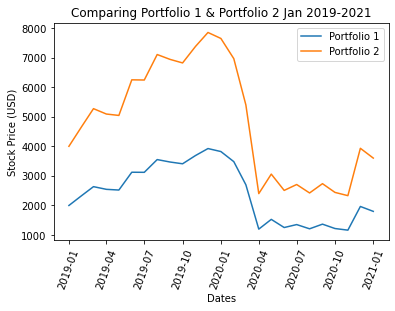

In [15]:
plt.plot(prices.index, port_1_value, label='Portfolio 1')
plt.plot(prices.index, Portfolio2, label='Portfolio 2')

# Define label
plt.title('Comparing Portfolio 1 & Portfolio 2 Jan 2019-2021')
plt.xlabel('Dates')
plt.xticks(rotation=70)
plt.ylabel('Stock Price (USD)')

# Create legend
plt.legend(loc='best')

plt.show()

In [16]:
%%latex
\newpage

<IPython.core.display.Latex object>


# Differences between 2:1 Margin Graph & Normal Graph

1. With *Portfolio 2* have the bigger value now, *portfolio 1*'s value drop doesn't look as tremendous as it did in the first graph.
2. Both graphs follow the same shape in the value flucations as its tracking the same stock but capital values are just different.

## Q3 5:1 Leverage
Now, let's say that your portfolio is made up of:
* Buy \\$2000 of AC shares
* Buy \\$10000 of AC shares on margin

In this scenario, you will be investigating the effects of buying more shares on margin.

### a) 
Using your total money, how many shares can you buy on Jan 2, 2020? 

In [17]:
capital_margin2=12000
#shares bought on 5:1 Margin
shares2=capital_margin2/(prices.loc['2019-01-01','Open'])
#Output shares purchased on 5:1 Margin
print('You purchased', round(shares2,2),"shares of 'AC.TO'")

You purchased 470.77 shares of 'AC.TO'


In [18]:
%%latex
\newpage

<IPython.core.display.Latex object>

### b)
Assume that the loan from the margin account has an annual interest rate of 8.325% with monthly payments as in the previous question. Recalculate your portfolio value as `portfolio3` and store this information in the `prices` DataFrame as you did in the previous part.

In [19]:
# portfolio 3 with 5:1 Margin Calculations
Portfolio3=shares2*prices['Open']
prices['Portfolio3']=Portfolio3-(monthly_interest*2000)
prices['Portfolio3'].loc['2019-01-01'] = 12000
#Output table of portfolio values
prices.head()


,Open,Portfolio1,Portfolio2,Portfolio3
Date,,,,
2019-01-01,25.490000,2000.000000,4000.000000,12000.000000
2019-02-01,29.790001,2337.387303,4660.899607,14010.448821
2019-03-01,33.599998,2636.327876,5258.780751,15804.092254
2019-04-01,32.439999,2545.311802,5076.748604,15257.995813
2019-05-01,32.139999,2521.773219,5029.671438,15116.764315


In [20]:
%%latex
\newpage

<IPython.core.display.Latex object>

### c)
Plot your portfolio value over the year superimposed on top of the portfolio value without any interest payments from Q1. Please include appropriate titles and labels. Discuss the important differences between the graph created here, and the one created in the 2:1 leverage case above.

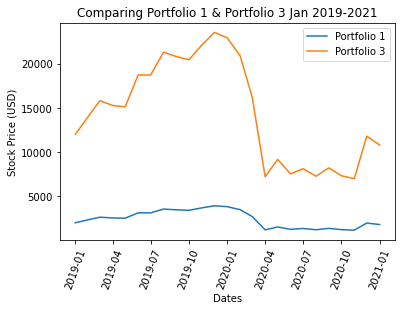

In [21]:
plt.plot(prices.index, port_1_value, label='Portfolio 1')
plt.plot(prices.index, Portfolio3, label='Portfolio 3')

# Define label
plt.title('Comparing Portfolio 1 & Portfolio 3 Jan 2019-2021')
plt.xlabel('Dates')
plt.xticks(rotation=70)
plt.ylabel('Stock Price (USD)')

# Create legend
plt.legend(loc='best')

plt.show()

In [22]:
%%latex
\newpage

<IPython.core.display.Latex object>


# Differences between 5:1 Margin Graph & 2:1 Margin Graph

1. As *portfolio 3* is more magnified, *portfolio 1* is almost non-existent in its value flucation on the 5:1 graph compared to the 2:1 graph. 
2. The losses are more maginified in *portfolio 3* compared to *portfolio 2* as we have more capital on our hands





## Q4 

### a)
We now explore the consequence of margin calls.  When the shares you purchased on margin go below a certain value, your broker will demand that you deposit more money into your account.  Let us make some simple assumptions.  First, you have no additional cash, so that a margin call will result in the liquidation of your stock (you have no other way to pay back the loan).  Second, the broker uses both the shares you purchased on margin, and the shares you purchased with your own money as collateral for the loan (i.e., the lender can take all your shares and sell them if you default).  We will use a very simple default criteria: whenever your portfolio value goes below zero, the broker confiscates and sells all your shares, and you default on the loan (no more interest payments are made after that).  Create a function that has a DataFrame and a column name as parameters, that searches portfolio2 and portfolio3 for margin calls.  In the event that a margin call would be issued, it should update the the portfolio returns after the event accordingly (i.e., taking into account what your lender will do).

There is no need to run this function on your portfolio from Q1.  Why do we know it is not needed?

In [23]:
#Function takes in dataframe & column name and accordingly adjusts portfolio for when margin call happens
def margin_call(frame,column_name):
    start=frame.loc['2019-01-01',column_name]
    margin=[value if value >= start else 0 for value in frame[column_name]]
    prices[column_name]=margin
    

margin_call(prices,'Portfolio2')
margin_call(prices,'Portfolio3')
#print dataframe
prices.head(25)

,Open,Portfolio1,Portfolio2,Portfolio3
Date,,,,
2019-01-01,25.490000,2000.000000,4000.000000,12000.000000
2019-02-01,29.790001,2337.387303,4660.899607,14010.448821
2019-03-01,33.599998,2636.327876,5258.780751,15804.092254
2019-04-01,32.439999,2545.311802,5076.748604,15257.995813
2019-05-01,32.139999,2521.773219,5029.671438,15116.764315
2019-06-01,39.810001,3123.578009,6233.281019,18727.593057
2019-07-01,39.770000,3120.439452,6227.003904,18708.761712
2019-08-01,45.259998,3551.196448,7088.517896,21293.303687
2019-09-01,44.209999,3468.811258,6923.747516,20798.992547


# Reason for not running function on normal portfolio
Their is no reason to run a margin call function on the normal portfolio as first
1. We used our own capital
2. We did not borrow any money on margin

### b) 
Plot one graph with the following portfolios superimposed:
* No leverage
* 2:1 leverage
* 5:1 leverage 

Compare the three plots. What do you notice in terms of margin calls? 

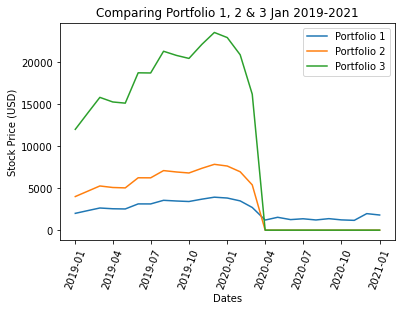

In [24]:
plt.plot(prices.index, port_1_value, label='Portfolio 1')
plt.plot(prices.index, prices['Portfolio2'], label='Portfolio 2')
plt.plot(prices.index, prices['Portfolio3'], label='Portfolio 3')

# Define label
plt.title('Comparing Portfolio 1, 2 & 3 Jan 2019-2021')
plt.xlabel('Dates')
plt.xticks(rotation=70)
plt.ylabel('Stock Price (USD)')

# Create legend
plt.legend(loc='best')

plt.show()


# Observation about margin calls

We see that the margin calls all happen at the same time for *portfolio 2* & *portfolio 3* and dip under their *starting value* on '2020-04-01'. 


In [25]:
%%latex
\newpage

<IPython.core.display.Latex object>

### c)
For the 2:1 and 5:1 leverage cases, determine the date at which a margin call occurs (if applicable).  This should take you one line of code per case (if applicable).  Discuss the overall effects of taking on higher leverage. 

In [26]:
#2:1 Margin Call Date
for values in prices['Portfolio2']:
    if values==0:
        break
    print('2020-04-01')

    #5:1 Margin Call Date
for values in prices['Portfolio2']:
    if values==0:
        break
    print('2020-04-01')

2020-04-01
2020-04-01
2020-04-01
2020-04-01
2020-04-01
2020-04-01
2020-04-01
2020-04-01
2020-04-01
2020-04-01
2020-04-01
2020-04-01
2020-04-01
2020-04-01
2020-04-01
2020-04-01
2020-04-01
2020-04-01
2020-04-01
2020-04-01
2020-04-01
2020-04-01
2020-04-01
2020-04-01
2020-04-01
2020-04-01
2020-04-01
2020-04-01
2020-04-01
2020-04-01


# Effects of Higher leverage
By having higher leverage, it can mulitply your gains or losses by how much you borrow and in this case, if the brokerage iniates a margin call if the stock goes under a certain threshold then we lose all our capital to the brokerage.

In [27]:
%%latex
\newpage

<IPython.core.display.Latex object>